<a href="https://colab.research.google.com/github/mayur7garg/66DaysOfData/blob/main/Day%2020/FeatureScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Scaling using sklearn

## Imports

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler, MaxAbsScaler
from sklearn.linear_model import Ridge, HuberRegressor, LinearRegression
from matplotlib import pyplot as plt

## Sample Data

In [2]:
N_FEATURES = 3
RANDOM_STATE = 7

X, y, coef = make_regression(n_samples = 100, n_features = N_FEATURES, noise = 2, tail_strength = 0.5, coef = True, random_state = RANDOM_STATE)
print(f"Original Coefficients: {coef}")
X.shape, y.shape

Original Coefficients: [27.48023833 92.72083143 54.19628379]


((100, 3), (100,))

## Adding outliers and data splitting

In [3]:
X[:3] = 1 + 0.9 * np.random.normal(size = (3, 3))
y[:3] = 1 + 2 * np.random.normal(size = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = RANDOM_STATE)

## Scalers and Regressors

### Scalers

In [4]:
scalers = [StandardScaler(),
           MinMaxScaler(),
           PowerTransformer(method = 'yeo-johnson'),
           RobustScaler(quantile_range = (25, 75)),
           MaxAbsScaler()
]

### Regressors

In [5]:
regressors = [Ridge(alpha = 1.0),
              HuberRegressor(),
              LinearRegression()
]

## Scaling the data using each scaler and then training every model on the scaled data

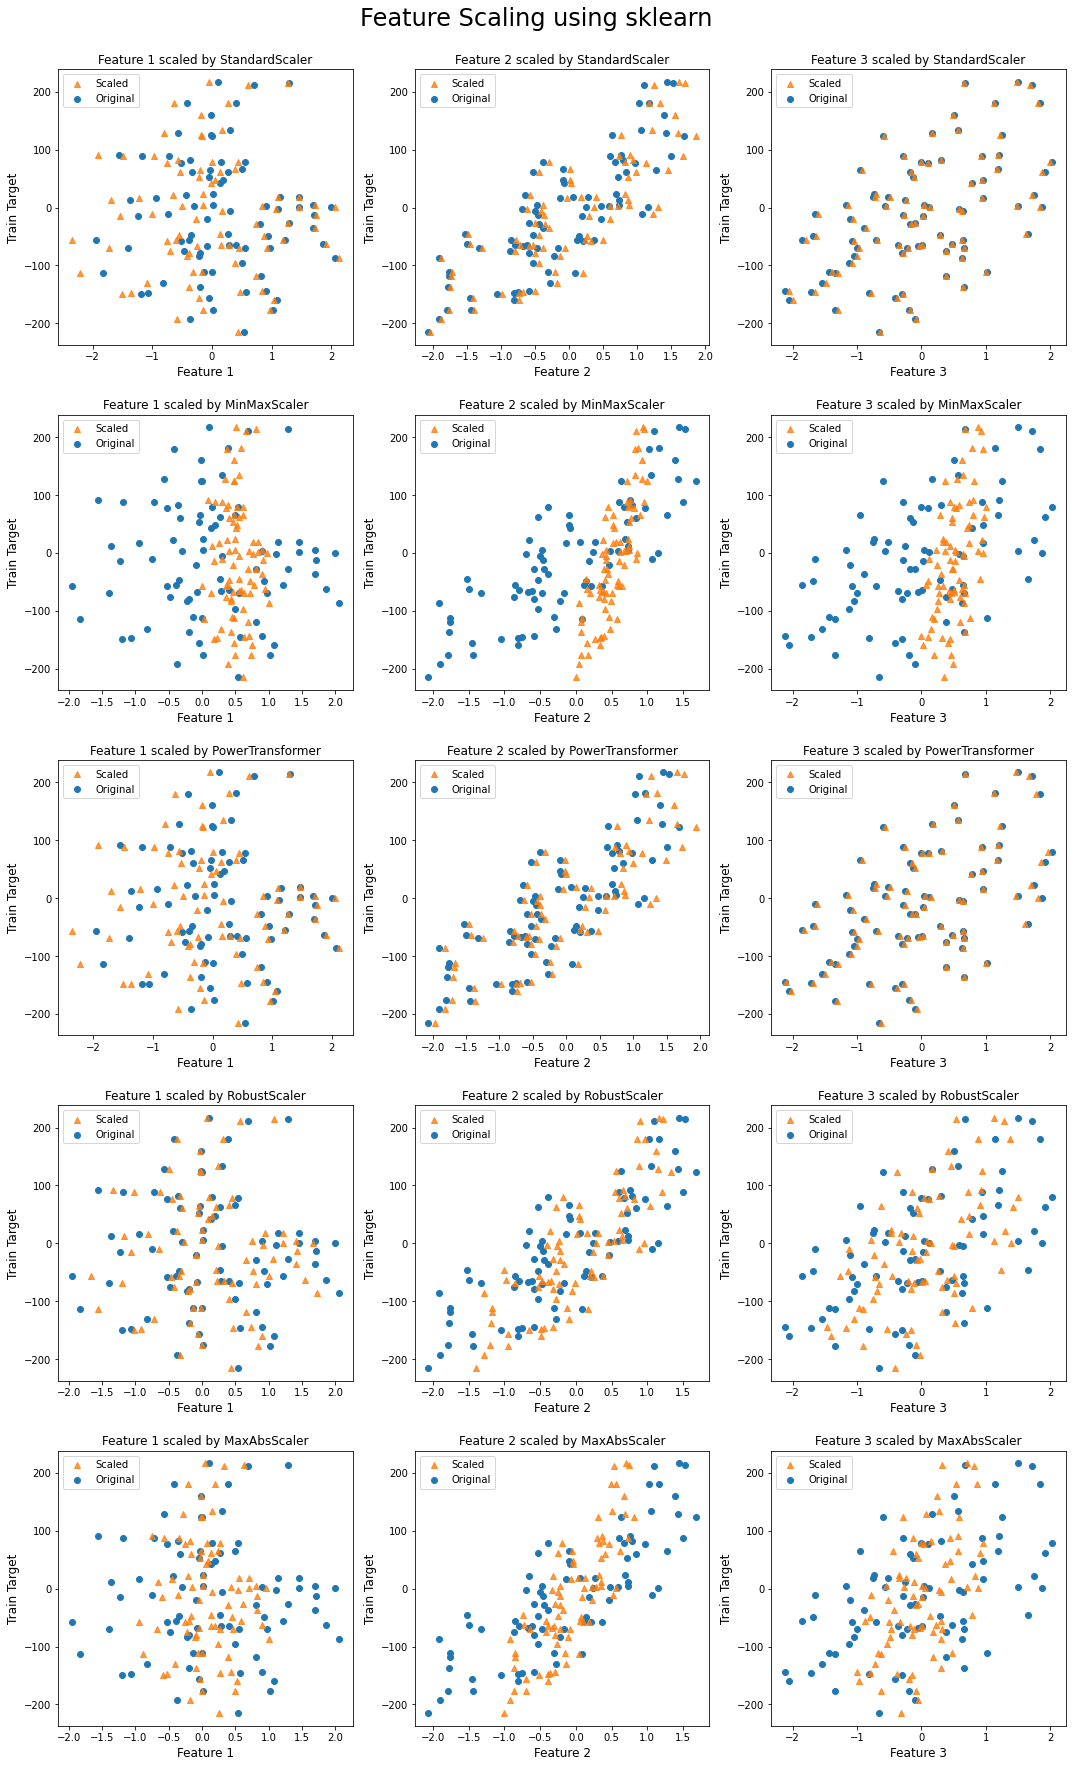

CPU times: user 3.07 s, sys: 173 ms, total: 3.24 s
Wall time: 3.12 s


In [6]:
%%time

results = {
    "Regressor": ["Actual data"],
    "Scaler": [None],
    "Feature 1 Coef": [coef[0]],
    "Feature 2 Coef": [coef[1]],
    "Feature 3 Coef": [coef[2]],
    "Test R2 Score": [None]
}

plt.figure(figsize = (15, 25))
plt.suptitle("Feature Scaling using sklearn", fontsize = 24)

for i, scaler in enumerate(scalers):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for j in range(N_FEATURES):
        plt.subplot(len(scalers), N_FEATURES, (i * N_FEATURES) + j + 1 )
        Original = plt.scatter(X_train[:,j], y_train)
        Scaled = plt.scatter(X_train_scaled[:,j], y_train, marker = '^', alpha = 0.8)
        plt.legend((Scaled, Original), ('Scaled', 'Original'), loc = 'upper left', fontsize = 10)
        plt.xlabel(f"Feature {j + 1}", fontsize = 12)
        plt.ylabel("Train Target", fontsize = 12)      
        plt.title(f"Feature {j + 1} scaled by {type(scaler).__name__}")

    for regressor in regressors:
        regressor.fit(X_train_scaled, y_train)
        r2_score = regressor.score(X_test_scaled, y_test)
        results["Regressor"].append(type(regressor).__name__)
        results["Scaler"].append(type(scaler).__name__)
        results["Feature 1 Coef"].append(regressor.coef_[0])
        results["Feature 2 Coef"].append(regressor.coef_[1])
        results["Feature 3 Coef"].append(regressor.coef_[2])
        results["Test R2 Score"].append(r2_score)

plt.tight_layout(rect = [0, 0, 1, 0.96], h_pad = 2)
plt.show()

## Results

### Scores and values of coefficients

In [7]:
results_df = pd.DataFrame(results).sort_values(["Regressor", "Scaler"], na_position = "first", ignore_index = True)
results_df

,Regressor,Scaler,Feature 1 Coef,Feature 2 Coef,Feature 3 Coef,Test R2 Score
0,Actual data,None,27.480238,92.720831,54.196284,NaN
1,HuberRegressor,MaxAbsScaler,56.807906,191.397122,114.037102,0.999421
2,HuberRegressor,MinMaxScaler,110.531170,347.097584,223.055368,0.999421
3,HuberRegressor,PowerTransformer,24.324033,88.893502,54.175269,0.998134
4,HuberRegressor,RobustScaler,32.639827,127.123183,75.214817,0.999421
5,HuberRegressor,StandardScaler,24.644500,89.014383,55.108386,0.999421
6,LinearRegression,MaxAbsScaler,31.928779,175.311352,97.657652,0.972573
7,LinearRegression,MinMaxScaler,62.127642,317.937155,191.023251,0.972573
8,LinearRegression,PowerTransformer,13.852584,81.607276,46.710230,0.971052
9,LinearRegression,RobustScaler,18.344886,116.438253,64.411152,0.972573


### Best performing regressors on average

In [8]:
results_df.groupby('Regressor', as_index = False).agg({"Test R2 Score": "mean"}).iloc[1:].sort_values("Test R2 Score", ascending = False, ignore_index = True)

,Regressor,Test R2 Score
0,HuberRegressor,0.999164
1,LinearRegression,0.972268
2,Ridge,0.955792


### Best performing scalers on average

In [9]:
results_df.groupby('Scaler', as_index = False).agg({"Test R2 Score": "mean"}).sort_values("Test R2 Score", ascending = False, ignore_index = True)

,Scaler,Test R2 Score
0,StandardScaler,0.980584
1,RobustScaler,0.979653
2,PowerTransformer,0.979142
3,MaxAbsScaler,0.976811
4,MinMaxScaler,0.962517
